In [13]:
import mne
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt


In [14]:
# abrindo os dados filtrados salvos em arquivos .fif (MNE)
mne_tf = mne.io.read_raw_fif('../dataset/filtered/tf.fif')

Opening raw data file ../dataset/filtered/tf.fif...
    Range : 0 ... 177729 =      0.000 ...   710.916 secs
Ready.


/tmp/ipykernel_11972/2272300756.py:2: RuntimeWarning: This filename (../dataset/filtered/tf.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mne_tf = mne.io.read_raw_fif('../dataset/filtered/tf.fif')


In [15]:
sr = 250
jump = 5
size = sr * jump

def calcular_potencias(segmento):
    nperseg = 128  # Número de pontos por segmento
    noverlap = nperseg // 2  # Quantidade de sobreposição entre segmentos
    
    freqs, psd = welch(segmento, fs=sr, nperseg=nperseg, noverlap=noverlap)
    X = np.average(psd, axis=0)

    # Definir os limites das bandas de frequência (em Hz)
    theta_band = (4, 8)       # Theta: 4 - 8 Hz
    alpha_band = (8, 13)      # Alpha: 8 - 13 Hz
    beta_band = (13, 30)      # Beta: 13 - 30 Hz
    gamma_band = (30, 100)    # Gamma: 30 - 100 Hz

    # Encontrar os índices correspondentes às frequências de interesse
    theta_idxs = np.where((freqs >= theta_band[0]) & (freqs <= theta_band[1]))[0]
    alpha_idxs = np.where((freqs >= alpha_band[0]) & (freqs <= alpha_band[1]))[0]
    beta_idxs = np.where((freqs >= beta_band[0]) & (freqs <= beta_band[1]))[0]
    gamma_idxs = np.where((freqs >= gamma_band[0]) & (freqs <= gamma_band[1]))[0]

    # Calcular a potência em cada banda de frequência
    theta_power = np.sum(X[theta_idxs])
    alpha_power = np.sum(X[alpha_idxs])
    beta_power = np.sum(X[beta_idxs])
    gamma_power = np.sum(X[gamma_idxs])

    return theta_power, alpha_power, beta_power, gamma_power

In [16]:

bandas_por_tempo = {'Theta': [], 'Alpha': [], 'Beta': [], 'Gamma': []}
datas = [mne_tf]
for data in datas:
    for i in range(0, len(data)-1, size):
        cut = data.get_data(start=i, stop=i+size)
        theta_power, alpha_power, beta_power, gamma_power = calcular_potencias(cut)
        bandas_por_tempo['Theta'].append(theta_power)
        bandas_por_tempo['Alpha'].append(alpha_power)
        bandas_por_tempo['Beta'].append(beta_power)
        bandas_por_tempo['Gamma'].append(gamma_power)

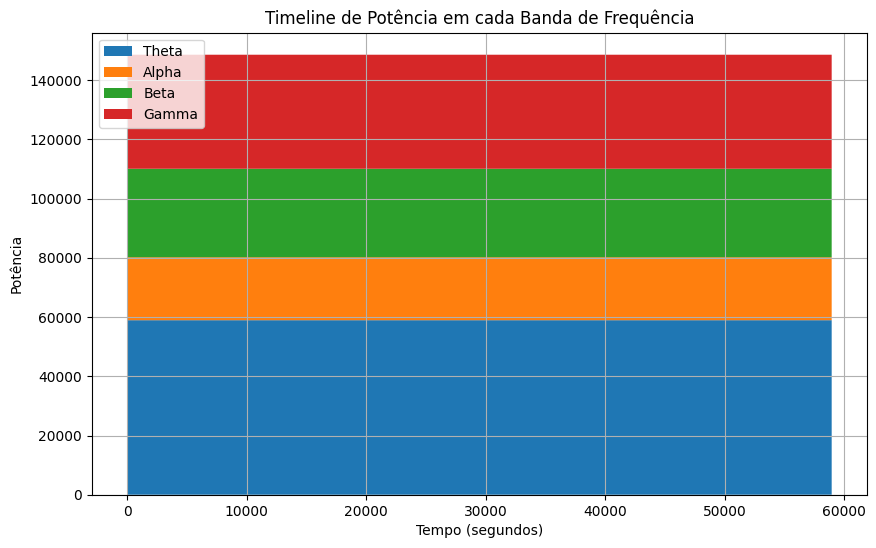

In [17]:
media_por_tempo = {banda: np.mean(potencias) for banda, potencias in bandas_por_tempo.items()}

# Plotar o gráfico de área empilhada
plt.figure(figsize=(10, 6))
plt.stackplot(range(int(media_por_tempo['Theta'])), media_por_tempo['Theta'], media_por_tempo['Alpha'],
              media_por_tempo['Beta'], media_por_tempo['Gamma'], labels=['Theta', 'Alpha', 'Beta', 'Gamma'])
plt.title('Timeline de Potência em cada Banda de Frequência')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Potência')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()